<a href="https://colab.research.google.com/github/Asmit-Dhakal/Deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Pytorch Work-flow**

In [1]:
topics={
    1:"data(prepare and load)",
    2: "build model",
    3: "fitting the model to the data(training)",
    4: "making prediciton and evaluating a model",
    5: "saving and loading model",
    6: "conclusion"
}

In [2]:
topics

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data(training)',
 4: 'making prediciton and evaluating a model',
 5: 'saving and loading model',
 6: 'conclusion'}

In [3]:
import torch
from torch import nn # nn contain all building block for neural network
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__



'2.2.1+cu121'

Machine learning has tow parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [4]:
# let us use linear regression formula and nake straight line

## Create *known* parameters
weight=0.7
bias=0.3

# Create
start = 0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias
X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X) ,len(y)

(50, 50)

In [6]:

# Spliting data into traing and test set .(one of the most important concepts in machine learning in general)
# Create a train /test split
train_split= int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test=X[train_split:], y[train_split:]

len(X_train) , len(y_train), len(X_test),  len(y_test)

(40, 40, 10, 10)

Visualize our Data


In [29]:
def plot_prediction(
    train_data =X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
  """
  Plots training data, test data and compare predicitons.

  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4, label="Training data")


  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g",s=4, label="Testing data")
  # Are there any predicitons
  if predictions is not None:
    # Plot the prediciton if they exist
    plt.scatter(test_data,predictions,c="r", s=4, label="Predicitions")

  # Show the legend
  plt.legend(prop={"size":14});

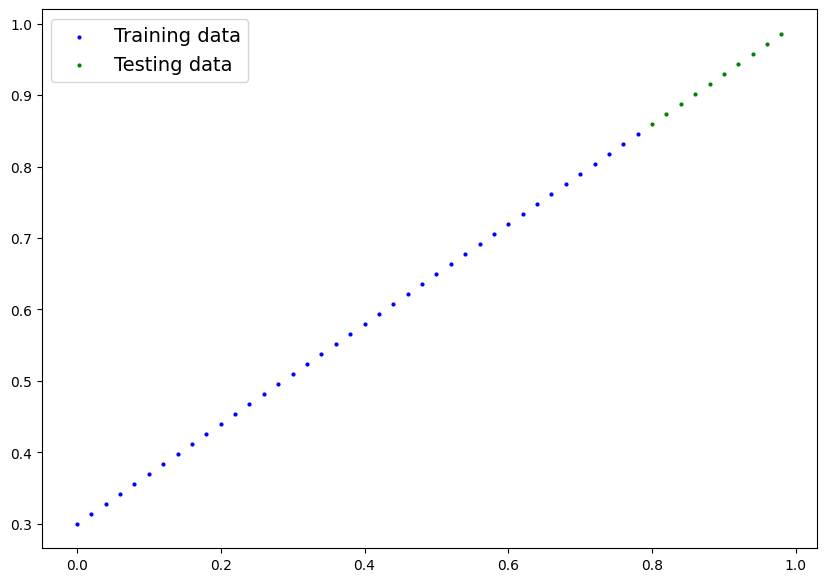

In [8]:
plot_prediction();

 # 2.Building pytorch model
  Our model works as:

  * Start with random values (weight @ bias)
  * Look at the training and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data)

  How does it do so ?

  Through two algorithm
  1. Gradient descent
  2. Backpropogration  

In [9]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <-almost everything in pytorch extract
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad =True, ))

  # Forward methods to define the computations in the model
  def forward(self, x:torch.Tensor) ->torch.Tensor: # <- "x" is the input data
      return self.weights*x + self.bias # this is the formula of linear regression






## PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural network)
* torch.nn.parameter -what model should try and learn
* torch.nn.Module - THe base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this whrere the optimizers in pytorch live, they will help in gradient descent
* def forward() - all nn.Module subclasses requires you to overwrite forward (), this method defines what happens in the forward computation


In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0= LinearRegressionModel()
model_0

# Check out parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Make predicition using `torch.inference_mode()`
 To check our models predicitve power, lets see how well it predicts `y_test` based on `x_test`

WHen we pass data through our model, its going to run it through the forward() methods.

In [18]:
# Make predicition with model
with torch.inference_mode():
   y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

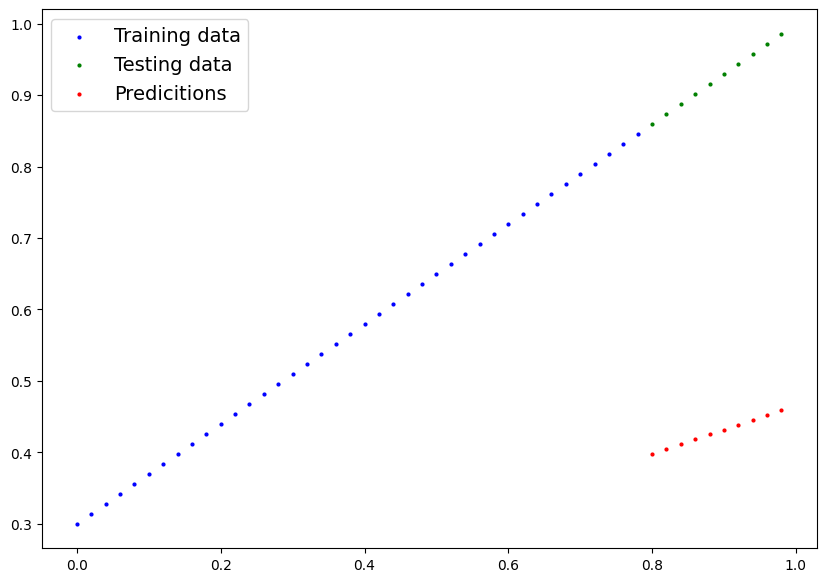

In [30]:
plot_prediction(predictions=y_preds)